In [26]:
from database_connection import connect_to_db, close_db_connection
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [39]:
def fetch_highest_selling_bags(conn, start_date=None, end_date=None):
    """Fetch the highest selling bags from the database. We will query the design and sales_order table on a column -design_id """

    query = f"""
        SELECT
            d.design_name AS product,
            SUM(so.units_sold) AS total_units_sold
        FROM
            fact_sales_order so
        JOIN
            dim_design d
        ON
            so.design_id = d.design_id
        WHERE
            so.created_date >= '2023-01-01'
            AND so.created_date <= '2023-03-31'
        GROUP BY
            d.design_name
        ORDER BY
            total_units_sold DESC
        ;
    """
    # Execute the query and fetch the results
    cursor = conn.cursor()
    cursor.execute(query)
    columns = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
    cursor.close()
    
    # Convert the result into a Pandas DataFrame
    return pd.DataFrame(rows, columns=columns)

In [40]:
def visualize_highest_selling_bags(data):
    """
    Plot revenue by region as a bar chart.
    """
    plt.figure(figsize=(10, 6))
    plt.bar(data['product'], data['total_units_sold'], color="skyblue", edgecolor="black")
    plt.title(f"Top-Selling Bags from {start_date} to {end_date}")
    plt.xlabel("Product")
    plt.ylabel("Total Units Sold (in millions)")
    plt.xticks(rotation=45)
    # Format y-axis in millions
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))
    plt.tight_layout()
    plt.savefig("highest_selling_bags.png")
    plt.show()
    plt.close()

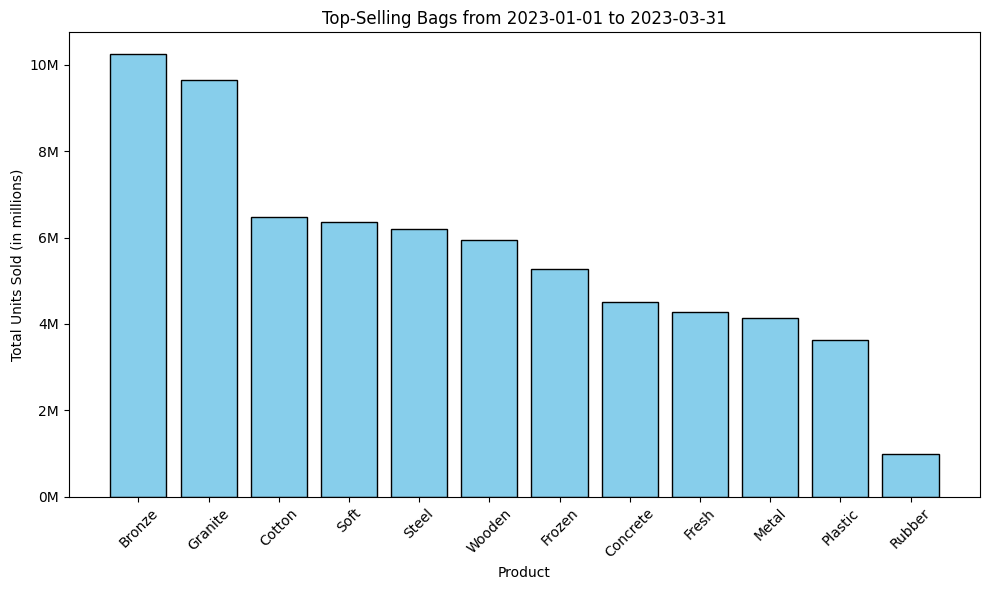

In [41]:
# Connect to the database
conn = connect_to_db()

# Fetch the data
start_date = "2023-01-01"
end_date = "2023-03-31"
highest_selling_products = fetch_highest_selling_bags(conn, start_date, end_date)

# Close the connection
conn.close()

# Visualize the data
visualize_highest_selling_bags(highest_selling_products)


## The highest selling designer bag we have witnessed is 'Bronze' which has made the most sales at around 10 million in the time frame of January to March 2023. On the other hand, the 'Rubber' bag was the least popular with only 1 million sales.